Importing the Dependencies

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics

Data Collection and Processing

In [2]:
# loading the data from csv file to pandas dataframe
car_dataset = pd.read_csv(r'C:\Users\HP\Documents\Car Price Prediction Project\Car Price Dataset.csv')

In [3]:
# inspecting the first 5 rows of the dataframe
car_dataset.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [4]:
# checking the number of rows and columns
car_dataset.shape

(4340, 8)

In [5]:
# getting some information about the dataset
car_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   selling_price  4340 non-null   int64 
 3   km_driven      4340 non-null   int64 
 4   fuel           4340 non-null   object
 5   seller_type    4340 non-null   object
 6   transmission   4340 non-null   object
 7   owner          4340 non-null   object
dtypes: int64(3), object(5)
memory usage: 271.4+ KB


In [6]:
# checking the number of missing values
car_dataset.isnull().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
dtype: int64

In [8]:
# checking the distribution of categorical data
print(car_dataset.fuel.value_counts())
print(car_dataset.seller_type.value_counts())
print(car_dataset.transmission.value_counts())

fuel
Diesel      2153
Petrol      2123
CNG           40
LPG           23
Electric       1
Name: count, dtype: int64
seller_type
Individual          3244
Dealer               994
Trustmark Dealer     102
Name: count, dtype: int64
transmission
Manual       3892
Automatic     448
Name: count, dtype: int64


Encoding the Categorical Data

In [9]:
# encoding "Fuel_Type" Column
car_dataset.replace({'Fuel_Type':{'Petrol':0,'Diesel':1,'CNG':2}},inplace=True)

# encoding "Seller_Type" Column
car_dataset.replace({'Seller_Type':{'Dealer':0,'Individual':1}},inplace=True)

# encoding "Transmission" Column
car_dataset.replace({'Transmission':{'Manual':0,'Automatic':1}},inplace=True)

In [10]:
car_dataset.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


Splitting the data and Target

In [12]:
X = car_dataset.drop(['name','selling_price'],axis=1)
Y = car_dataset['selling_price']

In [13]:
print(X)

      year  km_driven    fuel seller_type transmission         owner
0     2007      70000  Petrol  Individual       Manual   First Owner
1     2007      50000  Petrol  Individual       Manual   First Owner
2     2012     100000  Diesel  Individual       Manual   First Owner
3     2017      46000  Petrol  Individual       Manual   First Owner
4     2014     141000  Diesel  Individual       Manual  Second Owner
...    ...        ...     ...         ...          ...           ...
4335  2014      80000  Diesel  Individual       Manual  Second Owner
4336  2014      80000  Diesel  Individual       Manual  Second Owner
4337  2009      83000  Petrol  Individual       Manual  Second Owner
4338  2016      90000  Diesel  Individual       Manual   First Owner
4339  2016      40000  Petrol  Individual       Manual   First Owner

[4340 rows x 6 columns]


In [14]:
print(Y)

0        60000
1       135000
2       600000
3       250000
4       450000
         ...  
4335    409999
4336    409999
4337    110000
4338    865000
4339    225000
Name: selling_price, Length: 4340, dtype: int64


Splitting Training and Test data

In [15]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.1, random_state=2)

Model Training

1. Linear Regression

In [16]:
# loading the linear regression model
lin_reg_model = LinearRegression()

In [20]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

# Identify the columns with categorical data in X_train
categorical_columns = X_train.select_dtypes(include=['object']).columns

# Apply one-hot encoding to categorical features
ct = ColumnTransformer(
    transformers=[
        ('encoder', OneHotEncoder(), categorical_columns)
    ],
    remainder='passthrough'  # Keep the rest of the columns as they are
)

X_train_transformed = ct.fit_transform(X_train)

# Ensure Y_train is numeric (if needed)
if Y_train.dtype == 'object':
    Y_train = Y_train.astype('float')

# Fit the model
lin_reg_model.fit(X_train_transformed, Y_train)



LinearRegression()

Model Evaluation

In [22]:
# prediction on Training data
training_data_prediction = lin_reg_model.predict(X_train_transformed)

In [23]:
# R squared Error
error_score = metrics.r2_score(Y_train, training_data_prediction)
print("R squared Error : ", error_score)

R squared Error :  0.4510868454908876


Visualize the actual prices and Predicted prices

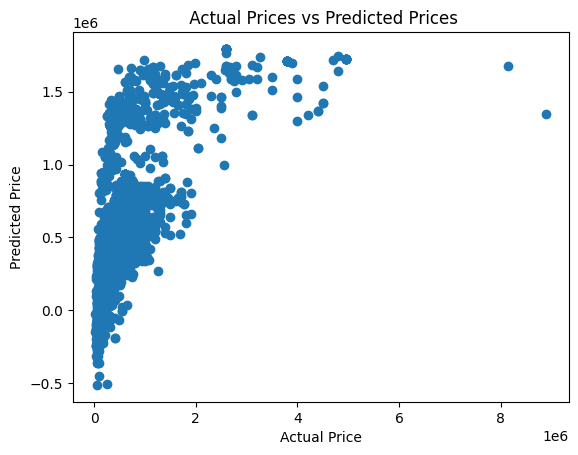

In [24]:
plt.scatter(Y_train, training_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()

In [26]:
# prediction on Training data
# Transform the test data using the same ColumnTransformer
X_test_transformed = ct.transform(X_test)

# Make predictions on the transformed test data
test_data_prediction = lin_reg_model.predict(X_test_transformed)


In [27]:
# R squared Error
error_score = metrics.r2_score(Y_test, test_data_prediction)
print("R squared Error : ", error_score)

R squared Error :  0.5304591679402979


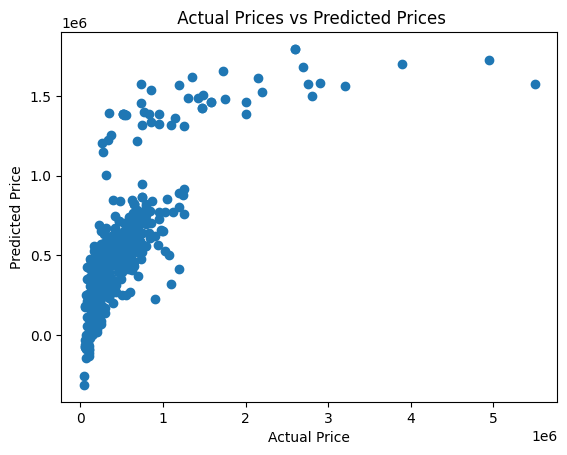

In [28]:
plt.scatter(Y_test, test_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()

2. Lasso Regression

In [29]:
# loading the linear regression model
lass_reg_model = Lasso()

In [31]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import Lasso

# Identify categorical columns
categorical_columns = X_train.select_dtypes(include=['object']).columns

# Define a ColumnTransformer to handle categorical data
ct = ColumnTransformer(
    transformers=[
        ('encoder', OneHotEncoder(), categorical_columns)
    ],
    remainder='passthrough'  # Keep numeric columns unchanged
)

# Transform X_train
X_train_transformed = ct.fit_transform(X_train)

# Ensure Y_train is numeric if necessary
if Y_train.dtype == 'object':
    Y_train = Y_train.astype(float)

# Initialize and fit the Lasso regression model
lass_reg_model = Lasso()
lass_reg_model.fit(X_train_transformed, Y_train)


C:\Users\HP\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.409e+12, tolerance: 1.306e+11
  model = cd_fast.enet_coordinate_descent(


Lasso()

Model Evaluation

In [33]:
# prediction on Training data
training_data_prediction = lass_reg_model.predict(X_train_transformed)

In [34]:
# R squared Error
error_score = metrics.r2_score(Y_train, training_data_prediction)
print("R squared Error : ", error_score)

R squared Error :  0.4510868319177912


Visualize the actual prices and Predicted prices

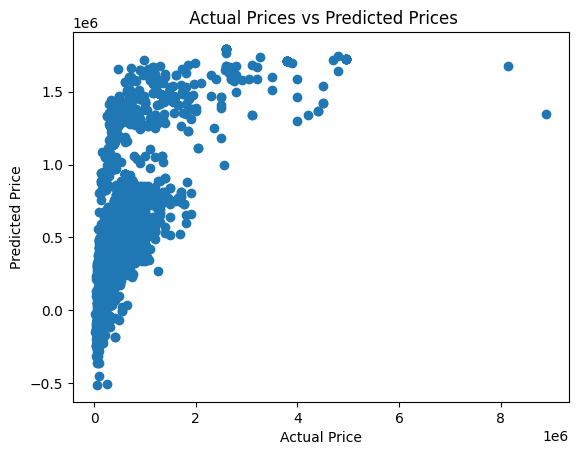

In [35]:
plt.scatter(Y_train, training_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()

In [37]:
# prediction on Training data
test_data_prediction = lass_reg_model.predict(X_test_transformed)

In [38]:
# R squared Error
error_score = metrics.r2_score(Y_test, test_data_prediction)
print("R squared Error : ", error_score)

R squared Error :  0.5304551918945071


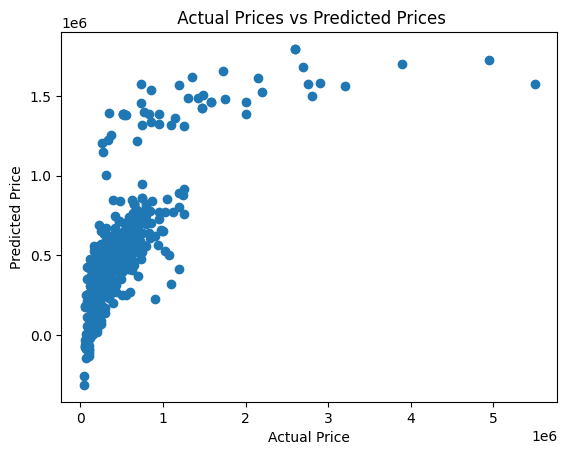

In [39]:
plt.scatter(Y_test, test_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()